# 1. IMPORT LIBRARIES AND DATASETS (Import th∆∞ vi·ªán v√† b·ªô d·ªØ li·ªáu)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv('amazon_alexa.tsv', sep ='\t')

In [3]:
reviews

rating       date                     variation  \
0          4  28-Jul-18                   White  Spot   
1          2  30-Jul-18  Configuration: Fire TV Stick   
2          4  30-Jul-18                   Black  Spot   
3          2  26-Jul-18                   White  Spot   
4          2  29-Jul-18             Sandstone Fabric    
...      ...        ...                           ...   
5145       1  21-Jun-18                         White   
5146       3   1-Jul-18                         Black   
5147       5  30-Jul-18                    Black  Dot   
5148       1  25-Jul-18                   Black  Plus   
5149       5  30-Jul-18              Charcoal Fabric    

                                       verified_reviews  feedback  
0                    Very helpful with daily activities         1  
1     I‚Äôm very unhappy with this Firestick, every ti...         0  
2                               The ease to use product         1  
3     Honestly it's no different from the Echo dots ...         0  
4     It's got great sound and bass but it doesn't w...         0  
...                                                 ...       ...  
5145  Two weeks after setting it up it no longer wor...         0  
5146                                     So far so good         1  
5147  I love this technology. I'm older, but this is...         1  
5148  It was supposed to come with a free Hue lightb...         0  
5149                                    Easy to set up.         1  

[5150 rows x 5 columns]

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            5150 non-null   int64 
 1   date              5150 non-null   object
 2   variation         5150 non-null   object
 3   verified_reviews  5149 non-null   object
 4   feedback          5150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 201.3+ KB


In [5]:
reviews.describe()

rating     feedback
count  5150.000000  5150.000000
mean      3.270291     0.561748
std       1.741375     0.496221
min       1.000000     0.000000
25%       1.000000     0.000000
50%       4.000000     1.000000
75%       5.000000     1.000000
max       5.000000     1.000000

In [6]:
reviews['verified_reviews']

0                      Very helpful with daily activities
1       I‚Äôm very unhappy with this Firestick, every ti...
2                                 The ease to use product
3       Honestly it's no different from the Echo dots ...
4       It's got great sound and bass but it doesn't w...
                              ...                        
5145    Two weeks after setting it up it no longer wor...
5146                                       So far so good
5147    I love this technology. I'm older, but this is...
5148    It was supposed to come with a free Hue lightb...
5149                                      Easy to set up.
Name: verified_reviews, Length: 5150, dtype: object

# 2. EXPLORE DATASET (T√¨m hi·ªÉu v√† khai ph√° b·ªô d·ªØ li·ªáu)

In [7]:
# Hi·ªÉn th·ªã s·ªë l∆∞·ª£ng d·ªØ li·ªáu Null trong c√°c c·ªôt
reviews.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [8]:
# V√¨ c·ªôt verified_reviews ƒëang c√≥ gi√° tr·ªã Null n√™n ta s·∫Ω lo·∫°i b·ªè gi√° tr·ªã Null trong c·ªôt verified_reviews b·∫±ng c√¢u l·ªánh sau
reviews = reviews.dropna(subset=['verified_reviews'])

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

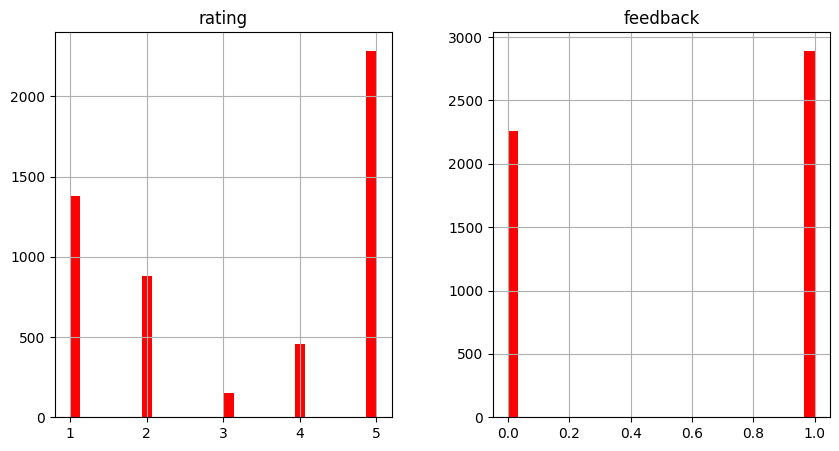

In [9]:
# H√†m n√†y ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ v·∫Ω bi·ªÉu ƒë·ªì histogram cho c√°c c·ªôt ki·ªÉu s·ªë (int, float) trong DataFrame
# bi·ªÉu ƒë·ªì c√≥ chi·ªÅu r·ªông l√† 10 inch v√† chi·ªÅu cao l√† 5 inch
# bi·ªÉu ƒë·ªì histogram s·∫Ω cho th·∫•y t·∫ßn su·∫•t xu·∫•t hi·ªán c·ªßa m·ªói gi√° tr·ªã trong c·ªôt.
reviews.hist(bins = 30, figsize = (10,5), color = 'r')

In [10]:
# Sau khi ch·∫°y l·ªánh, DataFrame reviews s·∫Ω c√≥ th√™m m·ªôt c·ªôt length, ch·ª©a s·ªë l∆∞·ª£ng k√Ω t·ª± trong m·ªói chu·ªói c·ªßa c·ªôt verified_reviews
reviews['length'] = reviews['verified_reviews'].apply(len)

C:\Users\20521\AppData\Local\Temp\ipykernel_8380\1526877029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['length'] = reviews['verified_reviews'].apply(len)


<Axes: xlabel='length', ylabel='Count'>

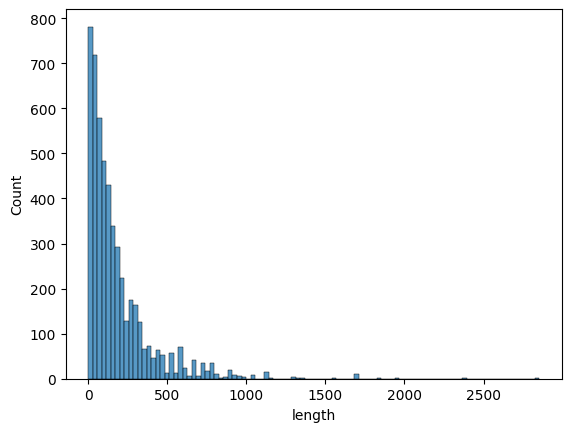

In [11]:
# v·∫Ω bi·ªÉu ƒë·ªì s·ªë l∆∞·ª£ng c√°c ch·ªØ c√°i trong t·ª´ng reviews
sns.histplot(data = reviews, x = 'length', bins = 100)

In [12]:
reviews['length'].describe()

count    5149.000000
mean      183.000777
std       213.206411
min         1.000000
25%        51.000000
50%       116.000000
75%       235.000000
max      2851.000000
Name: length, dtype: float64

In [13]:
# Review with longest length
# Hi·ªÉn th·ªã review d√†i nh·∫•t
reviews[reviews['length'] == 2851]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [14]:
# Review with shortest length
# Hi·ªÉn th·ªã review ng·∫Øn nh·∫•t
reviews[reviews['length'] == 1]['verified_reviews'].iloc[0]

' '

In [15]:
# Review with mean length
# Hi·ªÉn th·ªã review ƒë·ªô d√†i trung b√¨nh 
reviews[reviews['length'] == 133]['verified_reviews'].iloc[0]

'Mic hears everything but only understands about half the first time, it often takes multiple tries until it gives the correct result.'

In [16]:
# C√¢u l·ªánh n√†y s·∫Ω l·ªçc v√† t·∫°o ra m·ªôt DataFrame con, ch·ªâ ch·ª©a c√°c h√†ng trong reviews c√≥ gi√° tr·ªã c·ªôt feedback b·∫±ng 1 (feedback t√≠ch c·ª±c)
positive = reviews[reviews['feedback'] == 1]
positive


rating       date             variation  \
0          4  28-Jul-18           White  Spot   
2          4  30-Jul-18           Black  Spot   
5          5  29-Jul-18      Charcoal Fabric    
6          5  29-Jul-18  Heather Gray Fabric    
7          5   8-Jun-18                 Black   
...      ...        ...                   ...   
5141       5  30-Jul-18      Charcoal Fabric    
5142       5  30-Jul-18            White  Dot   
5146       3   1-Jul-18                 Black   
5147       5  30-Jul-18            Black  Dot   
5149       5  30-Jul-18      Charcoal Fabric    

                                       verified_reviews  feedback  length  
0                    Very helpful with daily activities         1      34  
2                               The ease to use product         1      23  
5                   Works great! Perfect for my office!         1      35  
6     Very cool and lots of fun! Used for a week and...         1      79  
7     Bought two of them and both work great. I'm no...         1     136  
...                                                 ...       ...     ...  
5141                                      Love our echo         1      13  
5142  very handy in the kitchen, sets timer and give...         1      84  
5146                                     So far so good         1      14  
5147  I love this technology. I'm older, but this is...         1     175  
5149                                    Easy to set up.         1      15  

[2893 rows x 6 columns]

In [17]:
# C√¢u l·ªánh n√†y s·∫Ω l·ªçc v√† t·∫°o ra m·ªôt DataFrame con, ch·ªâ ch·ª©a c√°c h√†ng trong reviews c√≥ gi√° tr·ªã c·ªôt feedback b·∫±ng 0 (feedback ti√™u c·ª±c)
negative = reviews[reviews['feedback'] == 0]
negative

rating       date                     variation  \
1          2  30-Jul-18  Configuration: Fire TV Stick   
3          2  26-Jul-18                   White  Spot   
4          2  29-Jul-18             Sandstone Fabric    
9          1  30-Jul-18                    Black  Dot   
11         2  29-Jul-18             Sandstone Fabric    
...      ...        ...                           ...   
5136       1  30-Jul-18                   Black  Show   
5143       2  30-Jul-18                    White  Dot   
5144       2  26-Jul-18                   White  Spot   
5145       1  21-Jun-18                         White   
5148       1  25-Jul-18                   Black  Plus   

                                       verified_reviews  feedback  length  
1     I‚Äôm very unhappy with this Firestick, every ti...         0     181  
3     Honestly it's no different from the Echo dots ...         0     166  
4     It's got great sound and bass but it doesn't w...         0     114  
9     I was really happy with my original echo so i ...         0     673  
11    I am not super impressed with Alexa. When my P...         0     307  
...                                                 ...       ...     ...  
5136  I have been through 4 Shows now.  And ALL OF T...         0     395  
5143  Not all that happy. The speaker isn‚Äôt great an...         0     197  
5144  I haven't figured out how to make or receive c...         0     117  
5145  Two weeks after setting it up it no longer wor...         0     140  
5148  It was supposed to come with a free Hue lightb...         0     114  

[2256 rows x 6 columns]

<Axes: xlabel='feedback', ylabel='count'>

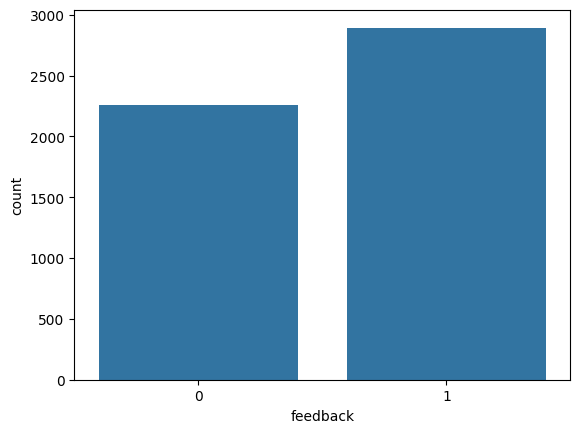

In [18]:
# C√¢u l·ªánh n√†y s·ª≠ d·ª•ng th∆∞ vi·ªán Seaborn (sns) 
# ƒê·ªÉ t·∫°o bi·ªÉu ƒë·ªì countplot nh·∫±m hi·ªÉn th·ªã s·ªë l∆∞·ª£ng c√°c gi√° tr·ªã trong c·ªôt feedback c·ªßa DataFrame reviews
sns.countplot(x = 'feedback', data = reviews)


<Axes: xlabel='rating', ylabel='count'>

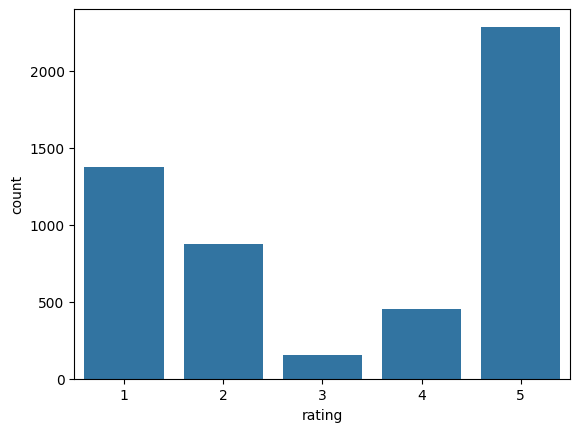

In [19]:
# t·∫°o bi·ªÉu ƒë·ªì th·ªÉ hi·ªán c√°c gi√° tr·ªã trong c·ªôt rating c·ªßa dataframe reviews
sns.countplot(x = 'rating', data = reviews)


<Axes: >

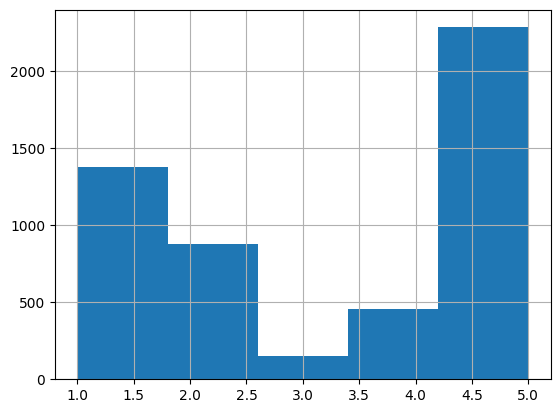

In [20]:
reviews['rating'].hist(bins = 5)

C:\Users\20521\AppData\Local\Temp\ipykernel_8380\3073896804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

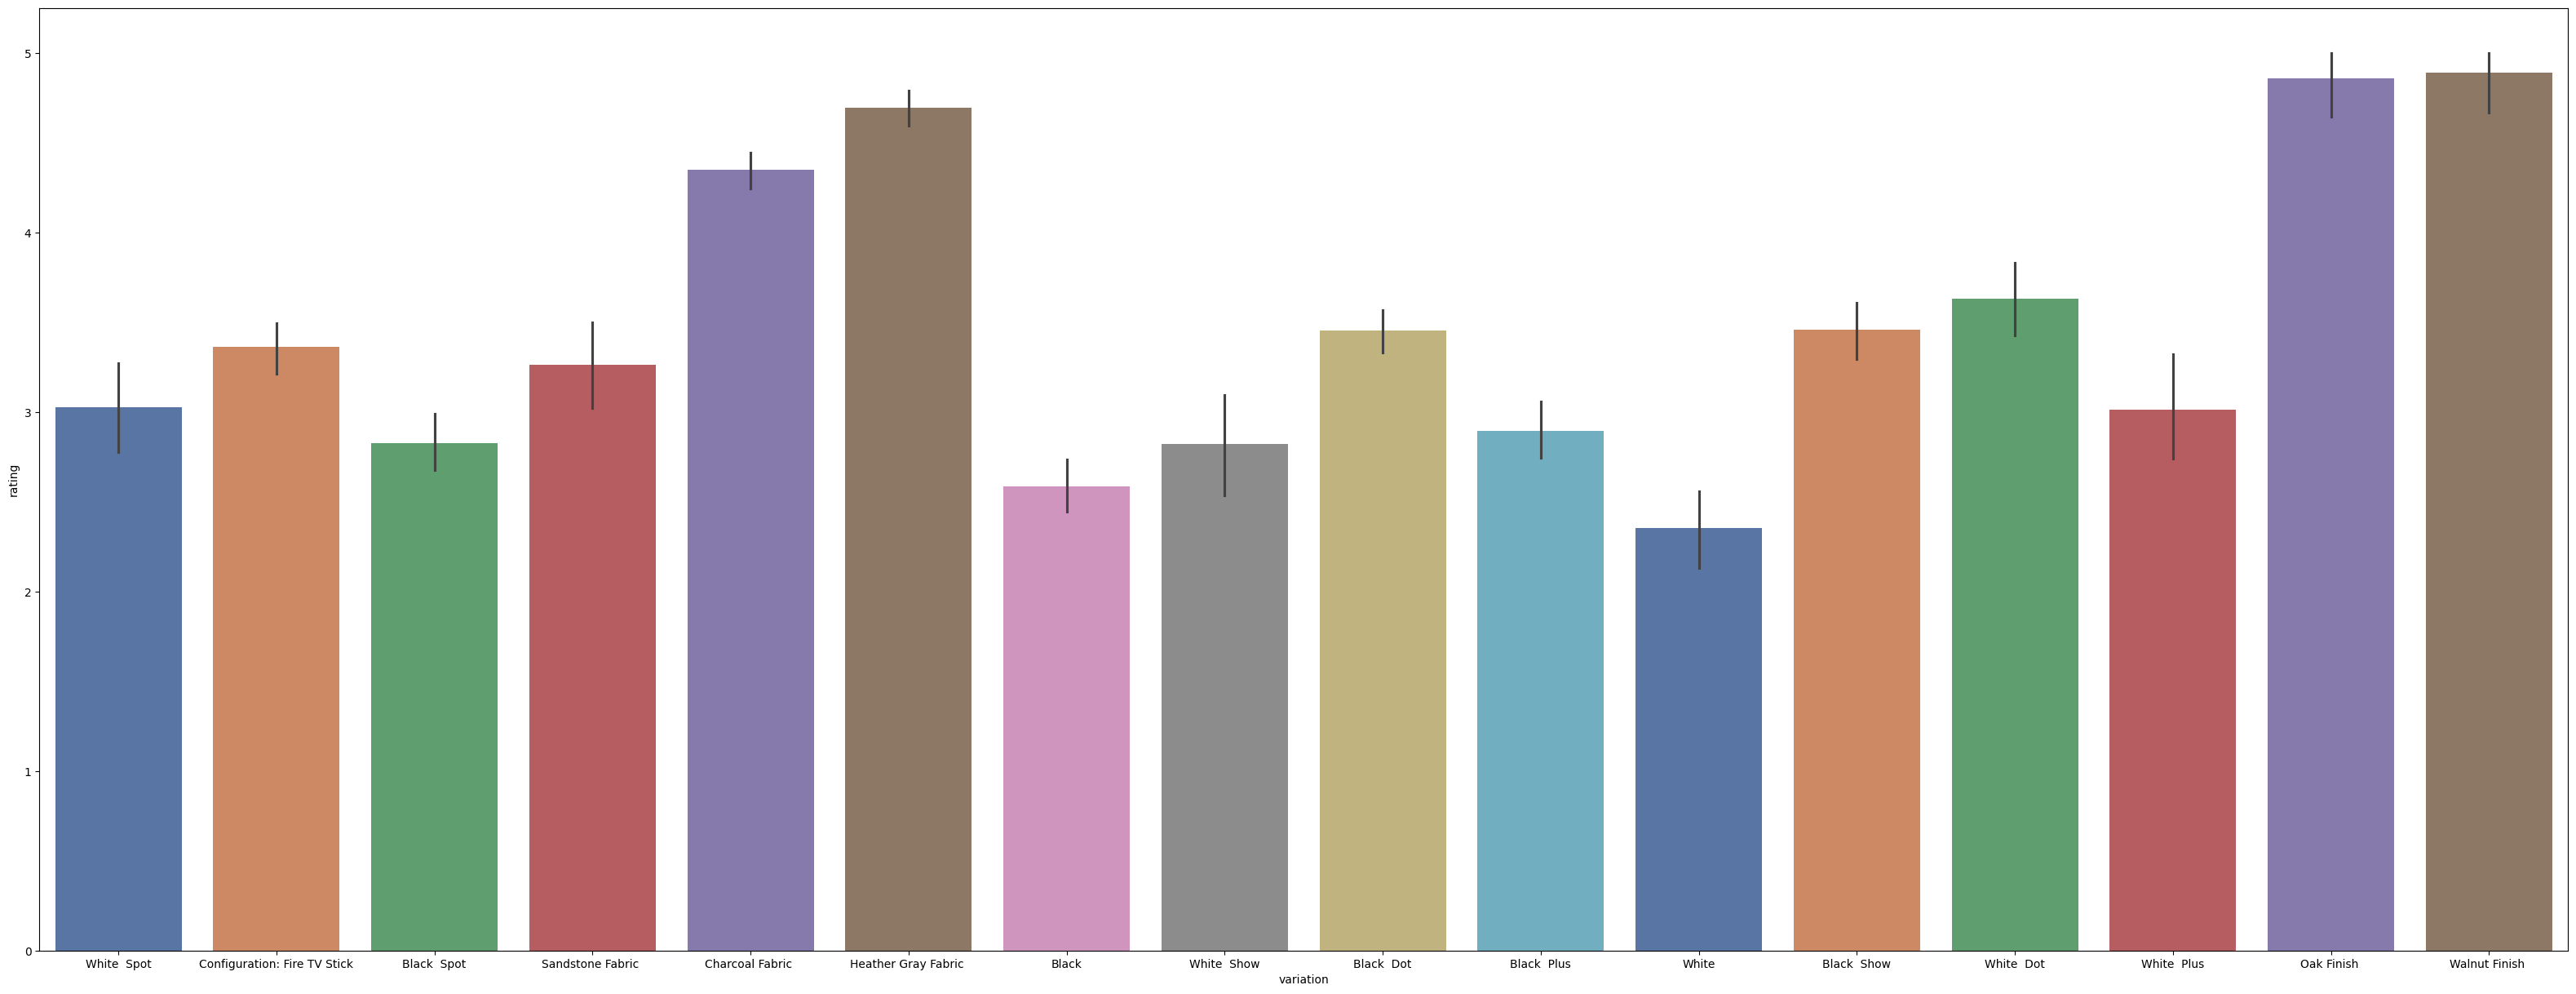

In [21]:
# V·∫Ω bi·ªÉu ƒë·ªì th·ªÉ hi·ªán gi√° tr·ªã c·ªßa rating trung b√¨nh c·ªßa t·ª´ng variation (bi·∫øn th·ªÉ s·∫£n ph·∫©m)
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y = 'rating', data = reviews, palette = 'deep')


In [22]:
# Chuy·ªÉn ƒë·ªïi c·ªôt verified_reviews th√†nh m·ªôt danh s√°ch (list). M·ªói ph·∫ßn t·ª≠ trong danh s√°ch n√†y l√† m·ªôt chu·ªói (string) t∆∞∆°ng ·ª©ng v·ªõi m·ªôt ƒë√°nh gi√°.
sentences = reviews['verified_reviews'].tolist()
len(sentences)


5149

In [23]:
# hi·ªÉn th·ªã danh s√°ch t·∫•t c·∫£ reviews
print(sentences)

['Very helpful with daily activities', 'I‚Äôm very unhappy with this Firestick, every time we change programs or channels within a program there is a very long delay. We have 2 Roku‚Äôs That work just fine and are very quick.', 'The ease to use product', "Honestly it's no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I'm listening too i really don't see the difference.", "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things", 'Works great! Perfect for my office!', 'Very cool and lots of fun! Used for a week and still learning its capabilities.', "Bought two of them and both work great. I'm not much on electronics running my home, but Alexa does all that I want and need to be done.", 'This product is even better than I imagined. I love the timer setting, it reminds me to put the clothes in the dryer if i ask it to, and i love shopping list feature.  My family enjoys the games

In [24]:
# N·ªëi t·∫•t c·∫£ c√°c chu·ªói trong danh s√°ch sentences th√†nh m·ªôt chu·ªói duy nh·∫•t, v·ªõi m·ªói c√¢u c√°ch nhau m·ªôt d·∫•u c√°ch " ". 
# K·∫øt qu·∫£ l√† m·ªôt chu·ªói d√†i ch·ª©a t·∫•t c·∫£ c√°c ƒë√°nh gi√° trong c·ªôt verified_reviews
sentences_as_one_string =" ".join(sentences)

In [25]:
sentences_as_one_string

'Very helpful with daily activities I‚Äôm very unhappy with this Firestick, every time we change programs or channels within a program there is a very long delay. We have 2 Roku‚Äôs That work just fine and are very quick. The ease to use product Honestly it\'s no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I\'m listening too i really don\'t see the difference. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things Works great! Perfect for my office! Very cool and lots of fun! Used for a week and still learning its capabilities. Bought two of them and both work great. I\'m not much on electronics running my home, but Alexa does all that I want and need to be done. This product is even better than I imagined. I love the timer setting, it reminds me to put the clothes in the dryer if i ask it to, and i love shopping list feature.  My family enjoys the games too! It‚Äôs made m

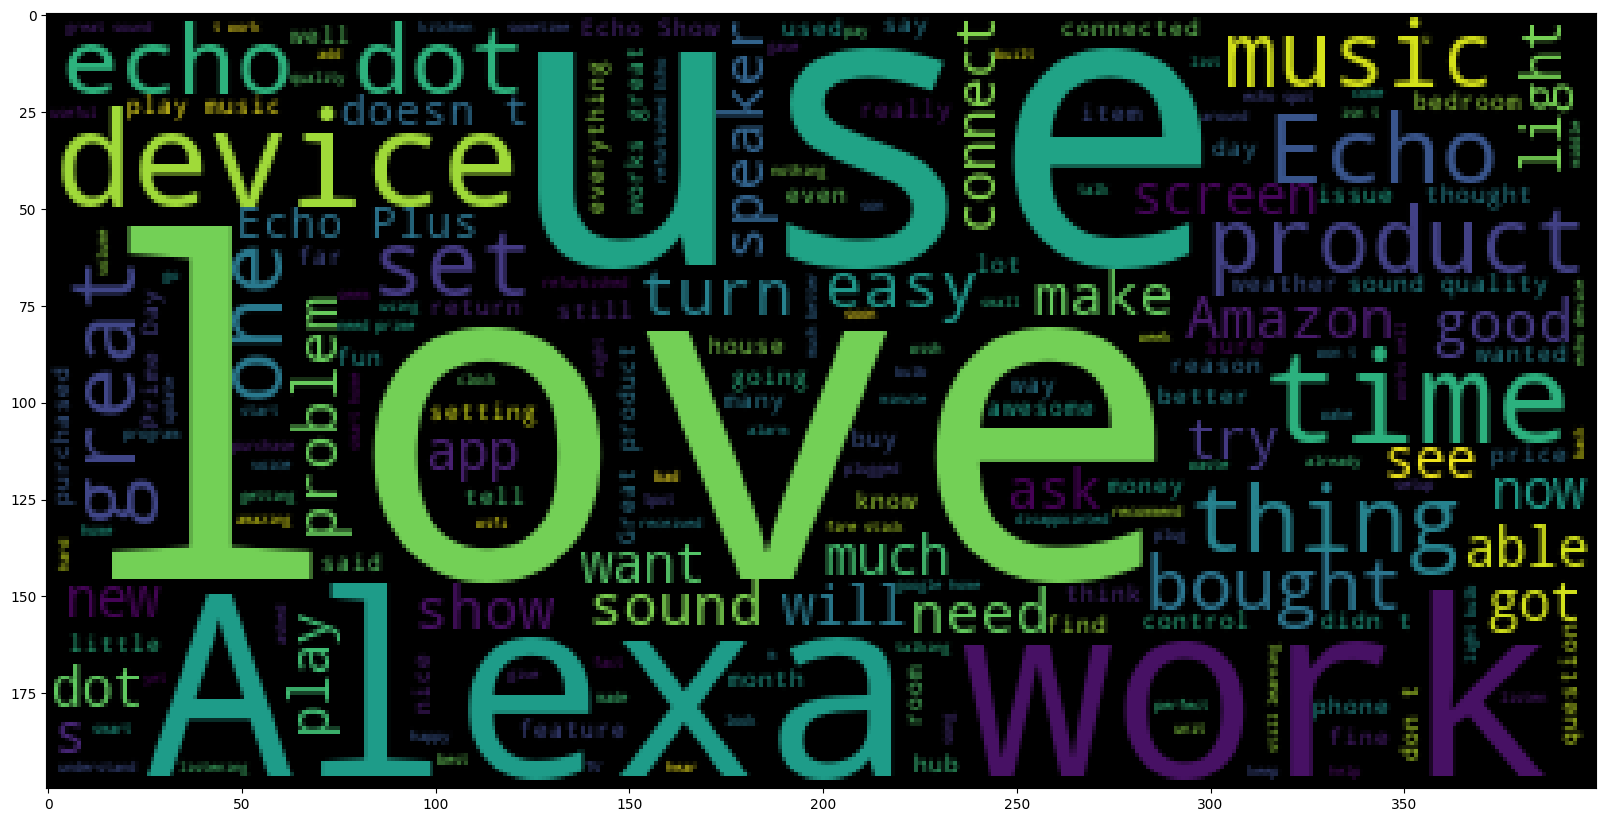

In [26]:
# Bi·ªÉu ƒë·ªì Word Cloud s·∫Ω hi·ªÉn th·ªã t·∫•t c·∫£ c√°c t·ª´ trong c√°c ƒë√°nh gi√° c·ªßa c·ªôt verified_reviews, v·ªõi c√°c t·ª´ ph·ªï bi·∫øn h∆°n ƒë∆∞·ª£c hi·ªÉn th·ªã l·ªõn h∆°n v√† r√µ r√†ng h∆°n.
# ƒêi·ªÅu n√†y gi√∫p b·∫°n tr·ª±c quan h√≥a c√°c t·ª´ kh√≥a hay c·ª•m t·ª´ m√† ng∆∞·ªùi d√πng s·ª≠ d·ª•ng nhi·ªÅu nh·∫•t trong ƒë√°nh gi√° c·ªßa h·ªç.
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))


In [27]:
# Chuy·ªÉn ƒë·ªïi c·ªôt verified_reviews c·ªßa danh s√°ch c√°c review ti√™u c·ª±c th√†nh m·ªôt danh s√°ch (list). 
# M·ªói ph·∫ßn t·ª≠ trong danh s√°ch n√†y l√† m·ªôt chu·ªói (string) t∆∞∆°ng ·ª©ng v·ªõi m·ªôt ƒë√°nh gi√°.
negative_list = negative['verified_reviews'].tolist()
negative_list

['I‚Äôm very unhappy with this Firestick, every time we change programs or channels within a program there is a very long delay. We have 2 Roku‚Äôs That work just fine and are very quick.',
 "Honestly it's no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I'm listening too i really don't see the difference.",
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I was really happy with my original echo so i thought I'd get an echo dot to use in my bedroom. I was really disappointed in the audio quality so I connected an external speaker via bluetooth. The audio was much better but I started having problems with it loosing connection with the wifi, presumably due to interference from the bluetooth. Then  I connected a speaker via the auxiliary jack. when i did that, the auxiliary jack picked up interference from the wifi and I was woken up in the middle of the night by a 

In [28]:
# N·ªëi c√°c danh review l·∫°i th√†nh 1 c√¢u
negative_sentences_as_one_string = " ".join(negative_list)

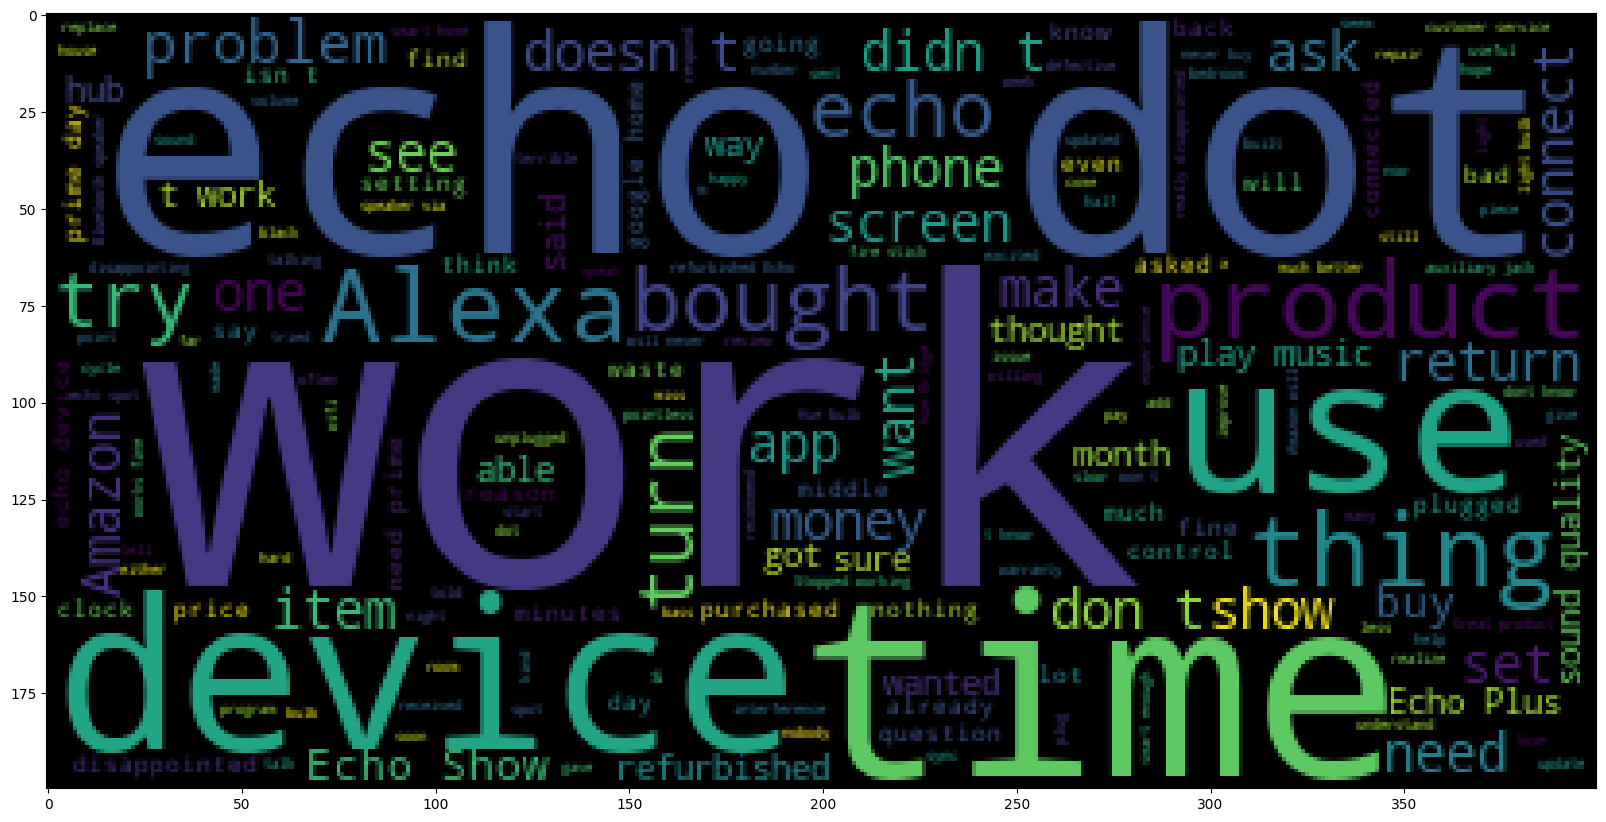

In [29]:
# Bi·ªÉu ƒë·ªì Word Cloud s·∫Ω hi·ªÉn th·ªã t·∫•t c·∫£ c√°c t·ª´ trong c√°c ƒë√°nh gi√° ti√™u c·ª±c c·ªßa c·ªôt verified_reviews, v·ªõi c√°c t·ª´ ph·ªï bi·∫øn h∆°n ƒë∆∞·ª£c hi·ªÉn th·ªã l·ªõn h∆°n v√† r√µ r√†ng h∆°n.
# ƒêi·ªÅu n√†y gi√∫p b·∫°n tr·ª±c quan h√≥a c√°c t·ª´ kh√≥a hay c·ª•m t·ª´ m√† ng∆∞·ªùi d√πng s·ª≠ d·ª•ng nhi·ªÅu nh·∫•t trong ƒë√°nh gi√° c·ªßa h·ªç.
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))

# 3. PERFORM DATA CLEANING (Bi·∫øn ƒë·ªïi v√† l√†m s·∫°ch d·ªØ li·ªáu)

In [30]:
reviews

rating       date                     variation  \
0          4  28-Jul-18                   White  Spot   
1          2  30-Jul-18  Configuration: Fire TV Stick   
2          4  30-Jul-18                   Black  Spot   
3          2  26-Jul-18                   White  Spot   
4          2  29-Jul-18             Sandstone Fabric    
...      ...        ...                           ...   
5145       1  21-Jun-18                         White   
5146       3   1-Jul-18                         Black   
5147       5  30-Jul-18                    Black  Dot   
5148       1  25-Jul-18                   Black  Plus   
5149       5  30-Jul-18              Charcoal Fabric    

                                       verified_reviews  feedback  length  
0                    Very helpful with daily activities         1      34  
1     I‚Äôm very unhappy with this Firestick, every ti...         0     181  
2                               The ease to use product         1      23  
3     Honestly it's no different from the Echo dots ...         0     166  
4     It's got great sound and bass but it doesn't w...         0     114  
...                                                 ...       ...     ...  
5145  Two weeks after setting it up it no longer wor...         0     140  
5146                                     So far so good         1      14  
5147  I love this technology. I'm older, but this is...         1     175  
5148  It was supposed to come with a free Hue lightb...         0     114  
5149                                    Easy to set up.         1      15  

[5149 rows x 6 columns]

In [31]:
# B·ªè c·ªôt date, rating, length trong dataframe reviews
reviews = reviews.drop(['date', 'rating', 'length'], axis = 1)
origin_data = reviews.copy()

In [32]:
reviews

variation  \
0                      White  Spot   
1     Configuration: Fire TV Stick   
2                      Black  Spot   
3                      White  Spot   
4                Sandstone Fabric    
...                            ...   
5145                         White   
5146                         Black   
5147                    Black  Dot   
5148                   Black  Plus   
5149              Charcoal Fabric    

                                       verified_reviews  feedback  
0                    Very helpful with daily activities         1  
1     I‚Äôm very unhappy with this Firestick, every ti...         0  
2                               The ease to use product         1  
3     Honestly it's no different from the Echo dots ...         0  
4     It's got great sound and bass but it doesn't w...         0  
...                                                 ...       ...  
5145  Two weeks after setting it up it no longer wor...         0  
5146                                     So far so good         1  
5147  I love this technology. I'm older, but this is...         1  
5148  It was supposed to come with a free Hue lightb...         0  
5149                                    Easy to set up.         1  

[5149 rows x 3 columns]

In [33]:
# ƒê√¢y l√† m·ªôt h√†m c·ªßa pandas d√πng ƒë·ªÉ chuy·ªÉn ƒë·ªïi c√°c bi·∫øn variation th√†nh d·∫°ng bi·∫øn gi·∫£ (dummy variables). 
# M·ªói gi√° tr·ªã ph√¢n lo·∫°i trong c·ªôt variation s·∫Ω ƒë∆∞·ª£c chuy·ªÉn th√†nh m·ªôt c·ªôt m·ªõi
# v·ªõi m·ªói gi√° tr·ªã ph√¢n lo·∫°i t∆∞∆°ng ·ª©ng s·∫Ω c√≥ gi√° tr·ªã 0 (False) ho·∫∑c 1 (True).
variation_dummies = pd.get_dummies(reviews['variation'], drop_first=False)

In [34]:
variation_dummies

Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0     False       False        False        False        False   
1     False       False        False        False        False   
2     False       False        False        False         True   
3     False       False        False        False        False   
4     False       False        False        False        False   
...     ...         ...          ...          ...          ...   
5145  False       False        False        False        False   
5146   True       False        False        False        False   
5147  False        True        False        False        False   
5148  False       False         True        False        False   
5149  False       False        False        False        False   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0                False                         False                 False   
1                False                          True                 False   
2                False                         False                 False   
3                False                         False                 False   
4                False                         False                 False   
...                ...                           ...                   ...   
5145             False                         False                 False   
5146             False                         False                 False   
5147             False                         False                 False   
5148             False                         False                 False   
5149              True                         False                 False   

      Oak Finish   Sandstone Fabric   Walnut Finish   White  White  Dot  \
0           False              False           False  False       False   
1           False              False           False  False       False   
2           False              False           False  False       False   
3           False              False           False  False       False   
4           False               True           False  False       False   
...           ...                ...             ...    ...         ...   
5145        False              False           False   True       False   
5146        False              False           False  False       False   
5147        False              False           False  False       False   
5148        False              False           False  False       False   
5149        False              False           False  False       False   

      White  Plus  White  Show  White  Spot  
0           False        False         True  
1           False        False        False  
2           False        False        False  
3           False        False         True  
4           False        False        False  
...           ...          ...          ...  
5145        False        False        False  
5146        False        False        False  
5147        False        False        False  
5148        False        False        False  
5149        False        False        False  

[5149 rows x 16 columns]

In [35]:
# B·ªè c·ªôt variation trong dataframe reviews
reviews.drop(['variation'], axis = 1, inplace = True)

In [36]:
# n·ªëi dataframe variation_dummies v√†o dataframe reviews
reviews = pd.concat([reviews, variation_dummies], axis =1)

In [37]:
reviews

verified_reviews  feedback  Black  \
0                    Very helpful with daily activities         1  False   
1     I‚Äôm very unhappy with this Firestick, every ti...         0  False   
2                               The ease to use product         1  False   
3     Honestly it's no different from the Echo dots ...         0  False   
4     It's got great sound and bass but it doesn't w...         0  False   
...                                                 ...       ...    ...   
5145  Two weeks after setting it up it no longer wor...         0  False   
5146                                     So far so good         1   True   
5147  I love this technology. I'm older, but this is...         1  False   
5148  It was supposed to come with a free Hue lightb...         0  False   
5149                                    Easy to set up.         1  False   

      Black  Dot  Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0          False        False        False        False             False   
1          False        False        False        False             False   
2          False        False        False         True             False   
3          False        False        False        False             False   
4          False        False        False        False             False   
...          ...          ...          ...          ...               ...   
5145       False        False        False        False             False   
5146       False        False        False        False             False   
5147        True        False        False        False             False   
5148       False         True        False        False             False   
5149       False        False        False        False              True   

      Configuration: Fire TV Stick  Heather Gray Fabric   Oak Finish   \
0                            False                 False        False   
1                             True                 False        False   
2                            False                 False        False   
3                            False                 False        False   
4                            False                 False        False   
...                            ...                   ...          ...   
5145                         False                 False        False   
5146                         False                 False        False   
5147                         False                 False        False   
5148                         False                 False        False   
5149                         False                 False        False   

      Sandstone Fabric   Walnut Finish   White  White  Dot  White  Plus  \
0                 False           False  False       False        False   
1                 False           False  False       False        False   
2                 False           False  False       False        False   
3                 False           False  False       False        False   
4                  True           False  False       False        False   
...                 ...             ...    ...         ...          ...   
5145              False           False   True       False        False   
5146              False           False  False       False        False   
5147              False           False  False       False        False   
5148              False           False  False       False        False   
5149              False           False  False       False        False   

      White  Show  White  Spot  
0           False         True  
1           False        False  
2           False        False  
3           False         True  
4           False        False  
...           ...          ...  
5145        False        False  
5146        False        False  
5147        False        False  
5148        False        False  
5149        False        False  

[5149 rows x 18 columns]

# 4. PERFORM DATA CLEANING BY APPLYING PUNCTUATION REMOVAL, STOP WORDS REMOVAL, AND COUNT VECTORIZER
## Th·ª±c hi·ªán l√†m s·∫°ch d·ªØ li·ªáu b·∫±ng c√°c b∆∞·ªõc lo·∫°i b·ªè d·∫•u c√¢u, lo·∫°i b·ªè t·ª´ d·ª´ng, v√† √°p d·ª•ng Count Vectorizer

In [38]:
# Trong ƒëo·∫°n m√£ n√†y ta s·∫Ω t·∫°o h√†m message_cleaning ƒë·ªÉ l√†m s·∫°ch vƒÉn b·∫£n b·∫±ng c√°ch th·ª±c hi·ªán c√°c b∆∞·ªõc sau:
# Lo·∫°i b·ªè d·∫•u c√¢u (punctuation removal).
import string
string.punctuation

# Lo·∫°i b·ªè t·ª´ d·ª´ng (stop words removal).
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def message_cleaning(message):
  Test_punc_removed = [char for char in message if char not in string.punctuation]
  Test_punc_removed_join = ''.join(Test_punc_removed)
  Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
  return Test_punc_removed_join_clean


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20521\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Th·ª±c hi·ªán vi·ªác l√†m s·∫°ch d·ªØ li·ªáu b·∫±ng c√°ch g·ªçi h√†m message_cleaning
reviews_clean = reviews['verified_reviews'].apply(message_cleaning)

In [40]:
# Hi·ªÉn th·ªã d·ªØ li·ªáu sau khi l√†m s·∫°ch
reviews_clean

0                            [helpful, daily, activities]
1       [I‚Äôm, unhappy, Firestick, every, time, change,...
2                                    [ease, use, product]
3       [Honestly, different, Echo, dots, already, occ...
4       [got, great, sound, bass, doesnt, work, time, ...
                              ...                        
5145    [Two, weeks, setting, longer, works, connectio...
5146                                          [far, good]
5147    [love, technology, Im, older, easy, set, use, ...
5148    [supposed, come, free, Hue, lightbulb, Amazon,...
5149                                          [Easy, set]
Name: verified_reviews, Length: 5149, dtype: object

In [41]:
# Hi·ªÉn th·ªã d·ªØ li·ªáu review th·ª© 3 sau khi l√†m s·∫°ch
print(reviews_clean[3])

['Honestly', 'different', 'Echo', 'dots', 'already', 'occasionally', 'seeing', 'lyrics', 'song', 'Im', 'listening', 'really', 'dont', 'see', 'difference']


In [42]:
# Hi·ªÉn th·ªã d·ªØ li·ªáu review th·ª© 3 tr∆∞·ªõc khi l√†m s·∫°ch
print(reviews['verified_reviews'][3])

Honestly it's no different from the Echo dots I already own,  other then occasionally seeing the lyrics to a song I'm listening too i really don't see the difference.


In [43]:
# Vector h√≥a vƒÉn b·∫£n trong c·ªôt reviews['verified_reviews'] b·∫±ng c√°ch s·ª≠ d·ª•ng CountVectorizer t·ª´ th∆∞ vi·ªán sklearn
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_cvr = vectorizer.fit_transform(reviews['verified_reviews'])

In [44]:
# Hi·ªÉn th·ªã danh s√°ch c√°c t·ª´ ƒë√£ ƒë∆∞·ª£c l√†m s·∫°ch
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... 'üò¨' 'üò≥' 'ü§ì']


In [45]:
# X√≥a c·ªôt verified_reviews trong dataframe reviews
reviews.drop(['verified_reviews'], axis = 1)

feedback  Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0            1  False       False        False        False        False   
1            0  False       False        False        False        False   
2            1  False       False        False        False         True   
3            0  False       False        False        False        False   
4            0  False       False        False        False        False   
...        ...    ...         ...          ...          ...          ...   
5145         0  False       False        False        False        False   
5146         1   True       False        False        False        False   
5147         1  False        True        False        False        False   
5148         0  False       False         True        False        False   
5149         1  False       False        False        False        False   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0                False                         False                 False   
1                False                          True                 False   
2                False                         False                 False   
3                False                         False                 False   
4                False                         False                 False   
...                ...                           ...                   ...   
5145             False                         False                 False   
5146             False                         False                 False   
5147             False                         False                 False   
5148             False                         False                 False   
5149              True                         False                 False   

      Oak Finish   Sandstone Fabric   Walnut Finish   White  White  Dot  \
0           False              False           False  False       False   
1           False              False           False  False       False   
2           False              False           False  False       False   
3           False              False           False  False       False   
4           False               True           False  False       False   
...           ...                ...             ...    ...         ...   
5145        False              False           False   True       False   
5146        False              False           False  False       False   
5147        False              False           False  False       False   
5148        False              False           False  False       False   
5149        False              False           False  False       False   

      White  Plus  White  Show  White  Spot  
0           False        False         True  
1           False        False        False  
2           False        False        False  
3           False        False         True  
4           False        False        False  
...           ...          ...          ...  
5145        False        False        False  
5146        False        False        False  
5147        False        False        False  
5148        False        False        False  
5149        False        False        False  

[5149 rows x 17 columns]

In [46]:
# Chuy·ªÉn ƒë·ªïi ma tr·∫≠n reviews_cvr th√†nh m·ªôt DataFrame c·ªßa pandas ƒë·ªÉ d·ªÖ d√†ng thao t√°c v√† ph√¢n t√≠ch
reviews_cvr = pd.DataFrame(reviews_cvr.toarray())

In [47]:
# k·∫øt h·ª£p DataFrame reviews v√† DataFrame reviews_cvr th√†nh m·ªôt DataFrame duy nh·∫•t c√≥ c·∫£ th√¥ng tin vƒÉn b·∫£n g·ªëc v√† d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c vector h√≥a
review_df = pd.concat([reviews.reset_index(drop=True), reviews_cvr.reset_index(drop=True)], axis=1)

In [48]:
review_df

verified_reviews  feedback  Black  \
0                    Very helpful with daily activities         1  False   
1     I‚Äôm very unhappy with this Firestick, every ti...         0  False   
2                               The ease to use product         1  False   
3     Honestly it's no different from the Echo dots ...         0  False   
4     It's got great sound and bass but it doesn't w...         0  False   
...                                                 ...       ...    ...   
5144  Two weeks after setting it up it no longer wor...         0  False   
5145                                     So far so good         1   True   
5146  I love this technology. I'm older, but this is...         1  False   
5147  It was supposed to come with a free Hue lightb...         0  False   
5148                                    Easy to set up.         1  False   

      Black  Dot  Black  Plus  Black  Show  Black  Spot  Charcoal Fabric   \
0          False        False        False        False             False   
1          False        False        False        False             False   
2          False        False        False         True             False   
3          False        False        False        False             False   
4          False        False        False        False             False   
...          ...          ...          ...          ...               ...   
5144       False        False        False        False             False   
5145       False        False        False        False             False   
5146        True        False        False        False             False   
5147       False         True        False        False             False   
5148       False        False        False        False              True   

      Configuration: Fire TV Stick  Heather Gray Fabric   ...  5201  5202  \
0                            False                 False  ...     0     0   
1                             True                 False  ...     0     0   
2                            False                 False  ...     0     0   
3                            False                 False  ...     0     0   
4                            False                 False  ...     0     0   
...                            ...                   ...  ...   ...   ...   
5144                         False                 False  ...     0     0   
5145                         False                 False  ...     0     0   
5146                         False                 False  ...     0     0   
5147                         False                 False  ...     0     0   
5148                         False                 False  ...     0     0   

      5203  5204  5205  5206  5207  5208  5209  5210  
0        0     0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0     0  
2        0     0     0     0     0     0     0     0  
3        0     0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...   ...  
5144     0     0     0     0     0     0     0     0  
5145     0     0     0     0     0     0     0     0  
5146     0     0     0     0     0     0     0     0  
5147     0     0     0     0     0     0     0     0  
5148     0     0     0     0     0     0     0     0  

[5149 rows x 5229 columns]

In [49]:
review_df.drop(['verified_reviews'], axis =1, inplace = True)

In [50]:
x = review_df.drop(['feedback'],axis =1)

In [51]:
x

Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
0     False       False        False        False        False   
1     False       False        False        False        False   
2     False       False        False        False         True   
3     False       False        False        False        False   
4     False       False        False        False        False   
...     ...         ...          ...          ...          ...   
5144  False       False        False        False        False   
5145   True       False        False        False        False   
5146  False        True        False        False        False   
5147  False       False         True        False        False   
5148  False       False        False        False        False   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
0                False                         False                 False   
1                False                          True                 False   
2                False                         False                 False   
3                False                         False                 False   
4                False                         False                 False   
...                ...                           ...                   ...   
5144             False                         False                 False   
5145             False                         False                 False   
5146             False                         False                 False   
5147             False                         False                 False   
5148              True                         False                 False   

      Oak Finish   Sandstone Fabric   ...  5201  5202  5203  5204  5205  5206  \
0           False              False  ...     0     0     0     0     0     0   
1           False              False  ...     0     0     0     0     0     0   
2           False              False  ...     0     0     0     0     0     0   
3           False              False  ...     0     0     0     0     0     0   
4           False               True  ...     0     0     0     0     0     0   
...           ...                ...  ...   ...   ...   ...   ...   ...   ...   
5144        False              False  ...     0     0     0     0     0     0   
5145        False              False  ...     0     0     0     0     0     0   
5146        False              False  ...     0     0     0     0     0     0   
5147        False              False  ...     0     0     0     0     0     0   
5148        False              False  ...     0     0     0     0     0     0   

      5207  5208  5209  5210  
0        0     0     0     0  
1        0     0     0     0  
2        0     0     0     0  
3        0     0     0     0  
4        0     0     0     0  
...    ...   ...   ...   ...  
5144     0     0     0     0  
5145     0     0     0     0  
5146     0     0     0     0  
5147     0     0     0     0  
5148     0     0     0     0  

[5149 rows x 5227 columns]

In [52]:
y = reviews['feedback']

# 5. TRAIN A NAIVE BAYES CLASSIFIER MODEL (Hu·∫•n luy·ªán m√¥ h√¨nh ph√¢n lo·∫°i b·∫±ng Naive Bayes)

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
NB_classifier = MultinomialNB()
x_train.columns = x_train.columns.astype(str) 
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [57]:
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
y_predict_train = NB_classifier.predict(x_train)
y_predict_train

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

<Axes: >

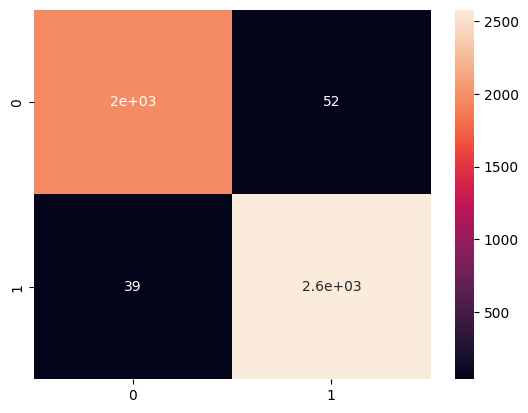

In [59]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

<Axes: >

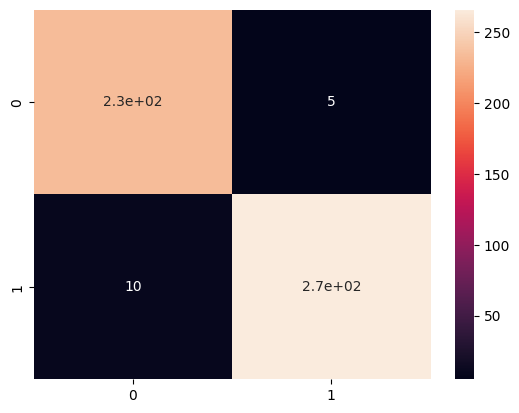

In [60]:
x_test.columns = x_test.columns.astype(str)
y_predict_test = NB_classifier.predict(x_test)
y_predict_test
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [61]:
print(x_test)

      Black  Black  Dot  Black  Plus  Black  Show  Black  Spot  \
1398  False        True        False        False        False   
566   False       False        False        False        False   
2181  False       False        False        False        False   
2497  False        True        False        False        False   
2962  False       False        False        False        False   
...     ...         ...          ...          ...          ...   
5135  False       False        False         True        False   
3784  False       False        False        False        False   
2935  False       False        False        False        False   
198   False       False         True        False        False   
3428  False       False        False        False        False   

      Charcoal Fabric   Configuration: Fire TV Stick  Heather Gray Fabric   \
1398             False                         False                 False   
566              False                         Fals

In [62]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       239
           1       0.98      0.96      0.97       276

    accuracy                           0.97       515
   macro avg       0.97      0.97      0.97       515
weighted avg       0.97      0.97      0.97       515



# 7. D·ª± ƒëo√°n ƒë√°nh gi√° (Feedback)

## M√¥ t·∫£ c√°c b∆∞·ªõc:
### B1: Chu·∫©n b·ªã b·ªô test (trong file test.xlsx - ch∆∞a c√≥ c·ªôt Feedback)
### B2: X·ª≠ l√Ω d·ªØ li·ªáu, x√≥a c√°c c·ªôt d∆∞ th·ª´a, bi·∫øn ƒë·ªïi c·∫•u tr√∫c
### B3: S·ª≠ d·ª•ng m√¥ h√¨nh Naive Bayes ƒë·ªÉ d·ª± ƒëo√°n
### B4: Ghi k·∫øt qu·∫£ v√†o file test.xlsx (file s·∫Ω xu·∫•t hi·ªán c·ªôt Feedback)



In [63]:
# H√†m x·ª≠ l√Ω d·ªØ li·ªáu
def process_data(data, origin_data):
    data = data.drop(['date', 'rating'], axis = 1)
    origin_data = origin_data.drop(['feedback'], axis = 1)
    data = pd.concat([origin_data, data], axis=0)
    variation_dummies = pd.get_dummies(data['variation'], drop_first=False)
    data.drop(['variation'], axis = 1, inplace = True)
    data = pd.concat([data, variation_dummies], axis =1)

    # Vector h√≥a vƒÉn b·∫£n trong c·ªôt reviews['verified_reviews'] b·∫±ng c√°ch s·ª≠ d·ª•ng CountVectorizer t·ª´ th∆∞ vi·ªán sklearn
    vectorizer = CountVectorizer(analyzer = message_cleaning)
    reviews_cvr = vectorizer.fit_transform(data['verified_reviews'])
    # X√≥a c·ªôt verified_reviews trong dataframe reviews
    data.drop(['verified_reviews'], axis = 1)
        
    # Chuy·ªÉn ƒë·ªïi ma tr·∫≠n reviews_cvr th√†nh m·ªôt DataFrame c·ªßa pandas ƒë·ªÉ d·ªÖ d√†ng thao t√°c v√† ph√¢n t√≠ch
    reviews_cvr = pd.DataFrame(reviews_cvr.toarray())
    
    #  k·∫øt h·ª£p DataFrame reviews v√† DataFrame reviews_cvr th√†nh m·ªôt DataFrame duy nh·∫•t c√≥ c·∫£ th√¥ng tin vƒÉn b·∫£n g·ªëc v√† d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c vector h√≥a
    review_df = pd.concat([data.reset_index(drop=True), reviews_cvr.reset_index(drop=True)], axis=1)
    review_df.drop(['verified_reviews'], axis =1, inplace = True)
    return review_df

In [64]:
# ƒê·ªçc file ƒë·ªÉ l·∫•y d·ªØ li·ªáu test
test_data = pd.read_excel('test.xlsx')
num_rows_test_data = len(test_data)


In [65]:
# G·ªçi h√†m x·ª≠ l√Ω d·ªØ li·ªáu
test_data = process_data(test_data, origin_data)

In [66]:
test_data.columns = test_data.columns.astype(str) 
test_data_predict = NB_classifier.predict(test_data)

# test_data_predict
print(test_data_predict[-num_rows_test_data:])
result = test_data_predict[-num_rows_test_data:]

# Mapping 0 -> 'Negative' v√† 1 -> 'Positive'
result = np.where(result == 0, 'Negative', 'Positive')
result_df = pd.DataFrame(result, columns=['feedback'])

# ƒê·ªçc file Excel hi·ªán t·∫°i v√†o DataFrame
output_data = pd.read_excel('test.xlsx')

# Th√™m c·ªôt 'feedback' v√†o DataFrame ƒë√£ c√≥
output_data['feedback'] = result_df['feedback']

# Ghi l·∫°i DataFrame v√†o file Excel, gi·ªØ nguy√™n c√°c d·ªØ li·ªáu c≈©
output_data.to_excel('test_result.xlsx', index=False)

[1 1 1 0 0 0 1 1 1 1 1 1 1]


# X√¢y d·ª±ng ·ª©ng d·ª•ng Web ƒë·ªÉ hi·ªán th·ª±c m√¥ h√¨nh


In [67]:
import pickle
import re
from sklearn.preprocessing import MinMaxScaler
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20521\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)
data.dropna(inplace=True)
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [69]:
# T·∫°o folder Models
import os
os.makedirs('Models', exist_ok=True)

cv = CountVectorizer(max_features = 2500) 
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [70]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 15)
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [71]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

pickle.dump(NB_classifier, open('Models/NB_classifier.pkl', 'wb'))